# Predict Diabetes Based on Various Features

Author: Yu Feng

Course Project, UC Irvine, Math 10, Summer 2023

## Introduction

Diabetes is one of the most prevalent chronic diseases today, which affects the way your body converts food into energy. In this project, I will analyze the correlation between various medical history and demographic factors and diabetes prevalence and identify potential risk factors. This project will utilize tools such as pandas, numpy, seaborn, machine learning, and etc. to predict diabetes.

## Preparation and Explore the Data

First, I will import some packages that I will use in this project.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import altair as alt
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

Then, we load the dataset by using pandas and make an DataFrame as `df`, and see some basic informations of the data.



In [2]:
df = pd.read_csv("diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


The dataset has 9 columns in total, and the last column is "diabetes". It is the target variable for prediction, a value of 1 indicates the presence of diabetes, and a value of 0 indicates the absence of diabetes.

In [3]:
df.shape

(100000, 9)

Based on the shape of the DataFrame, there are 100000 rows and 9 columns in this dataset.

In [4]:
df.isna().any(axis=0)

gender                 False
age                    False
hypertension           False
heart_disease          False
smoking_history        False
bmi                    False
HbA1c_level            False
blood_glucose_level    False
diabetes               False
dtype: bool

By checking for missing values in the DataFrame, we can see there is no NaN in each column, so we do not need to drop anything.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

We can see the name of each column and what data informations and DataType they consist of.

In [7]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


We can see the descriptive statistics for each column in the dataset, which includes calculating measures such as the mean, median, standard deviation, and range for the quantitative variables, and frequency counts for the different variables.

## Visualization

### The Distribution of Diabetes

* We know **Altair** has difficulty processing datasets larger than a few thousand rows
* Let's create a bar chart to view diabetes value counts by using Altair.

In [8]:
diabetes_value_counts = df["diabetes"].value_counts()
diabetes_value_counts

0    91500
1     8500
Name: diabetes, dtype: int64

In [9]:
diabetes_value = df["diabetes"].value_counts().reset_index()

diabetes_value.columns = ["Diabetes", "Count"]

alt.Chart(diabetes_value).mark_bar().encode(
    x="Diabetes:O",
    y="Count:Q",
    tooltip=["Diabetes", "Count"]
).properties(
    title="Diabetes Value Counts"
)

alt.Chart(...)

* Since our dataset is too large, we will use **Seaborn** and **Matplotlib** for the following visualization.
* Let's create pie chart to visualize the distribution of diabetes by using Matplotlib.

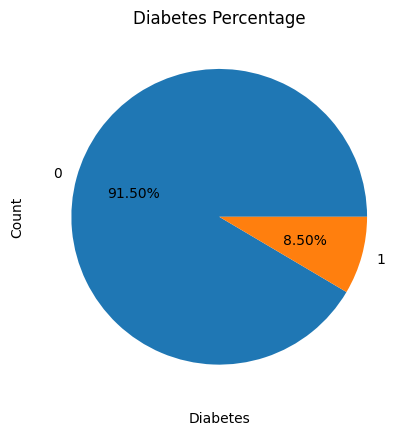

In [10]:
diabetes_value_counts.plot(kind = "pie",autopct = "%2.2f%%")
plt.title("Diabetes Percentage")
plt.xlabel("Diabetes")
plt.ylabel("Count")
plt.show()

From the pie chart above, 8500/100000 = 8.5% of people have diabetes.

### Create histograms to visualize the distribution of continuous variables such as age, bmi, and etc.

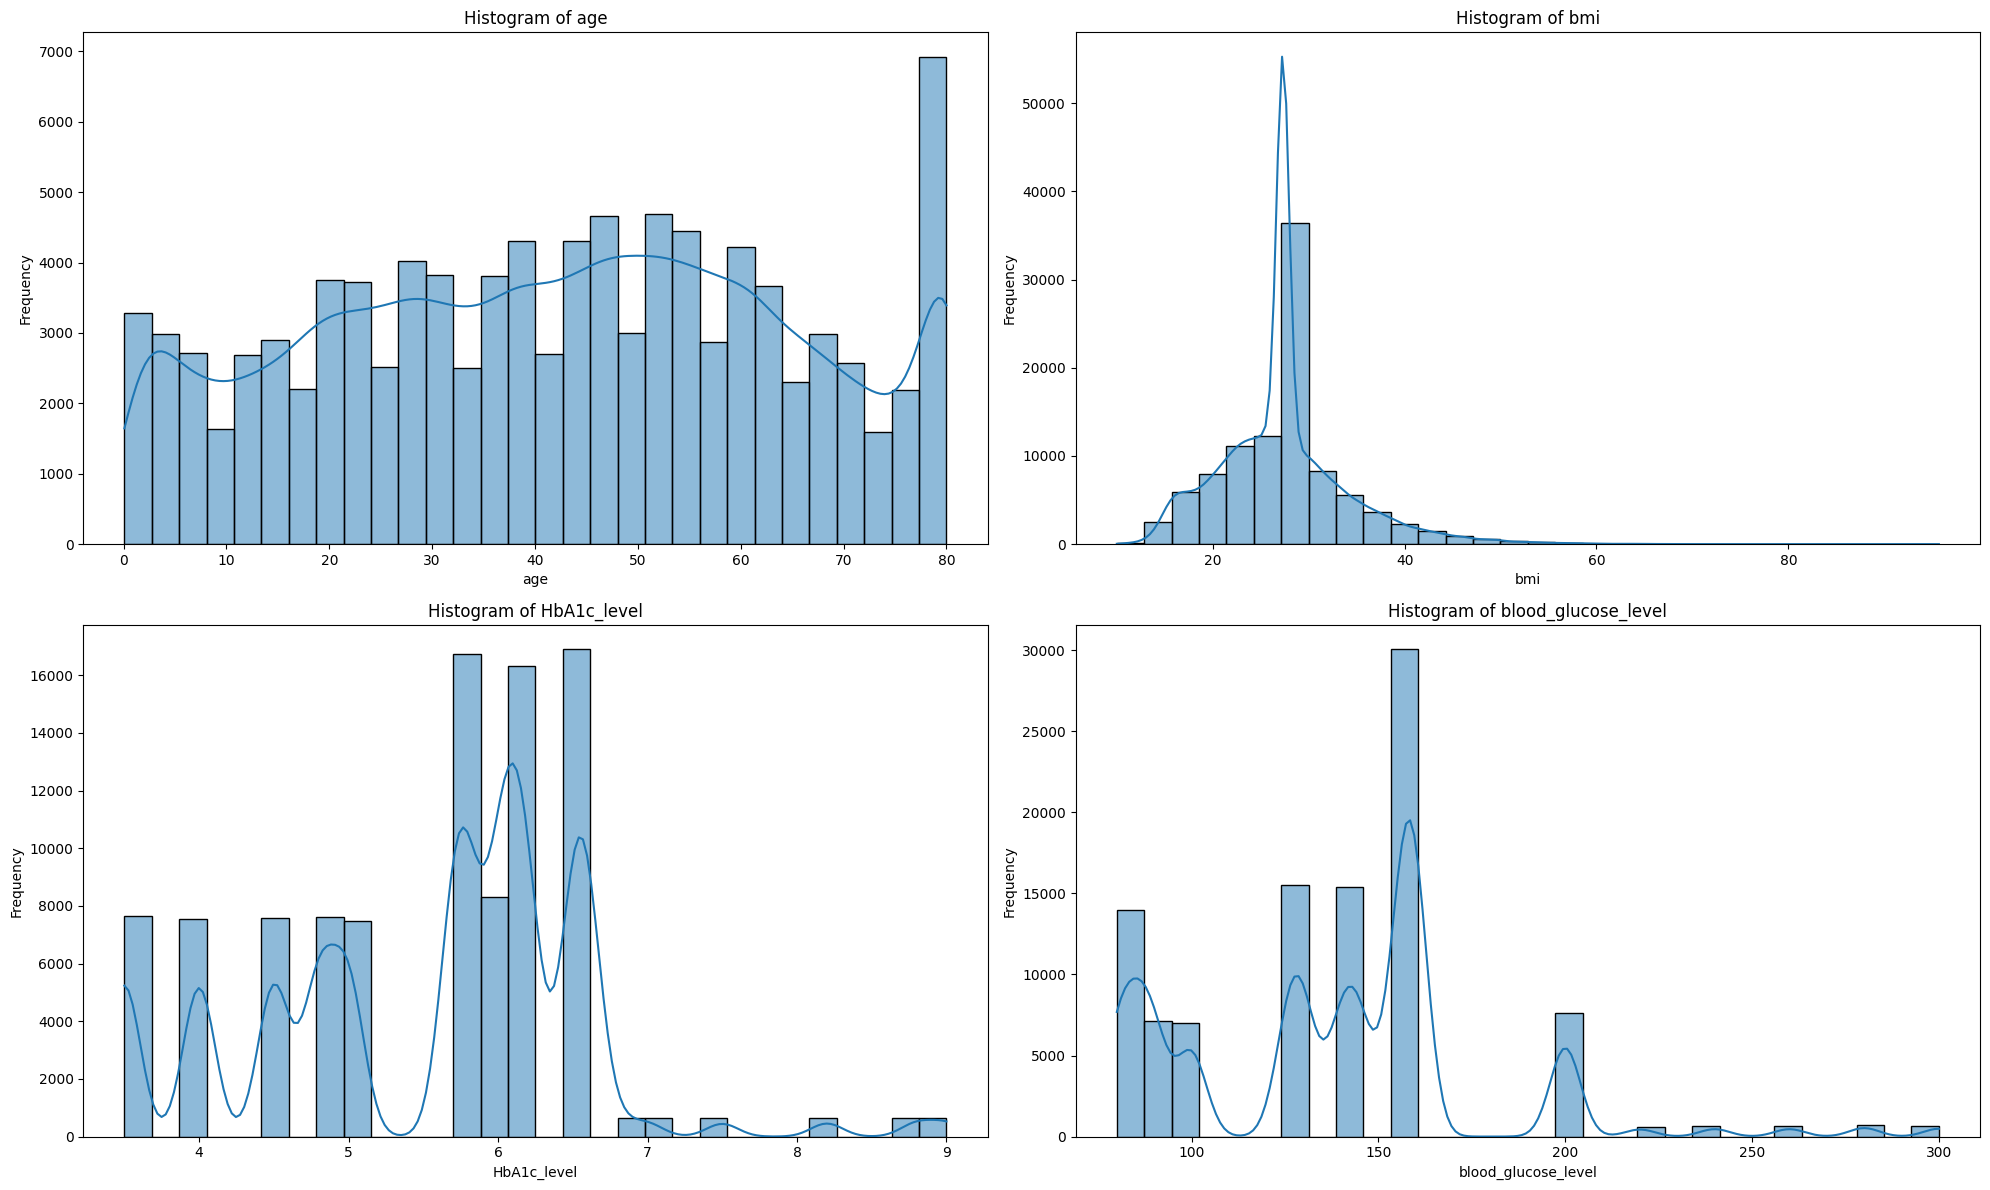

In [11]:
continuous_vars = ["age", "bmi", "HbA1c_level", "blood_glucose_level"]

plt.figure(figsize=(20, 12))

count = 1
for var in continuous_vars: 
    plt.subplot(2, 2, count)
    sns.histplot(df[var], bins=30, kde=True)
    plt.title(f"Histogram of {var}")
    plt.xlabel(var)
    plt.ylabel("Frequency")
    count += 1

plt.tight_layout() # To ensure that the subplots fit nicely within the figure without overlapping with each other
plt.show()

* Based on the histograms for continuous variables above, we can see that there are more people in the elderly group in **age** distribution. 
* The **BMI** distribution is centered around between 25-30. 
* For **HbA1c level** distribution, most people have levels below 6.5. 
* For Distribution of **blood glucose levels**, most people have levels below 200.

### Create bar plots to visualize the distribution of categorical variables such as gender, smoking history, and etc.

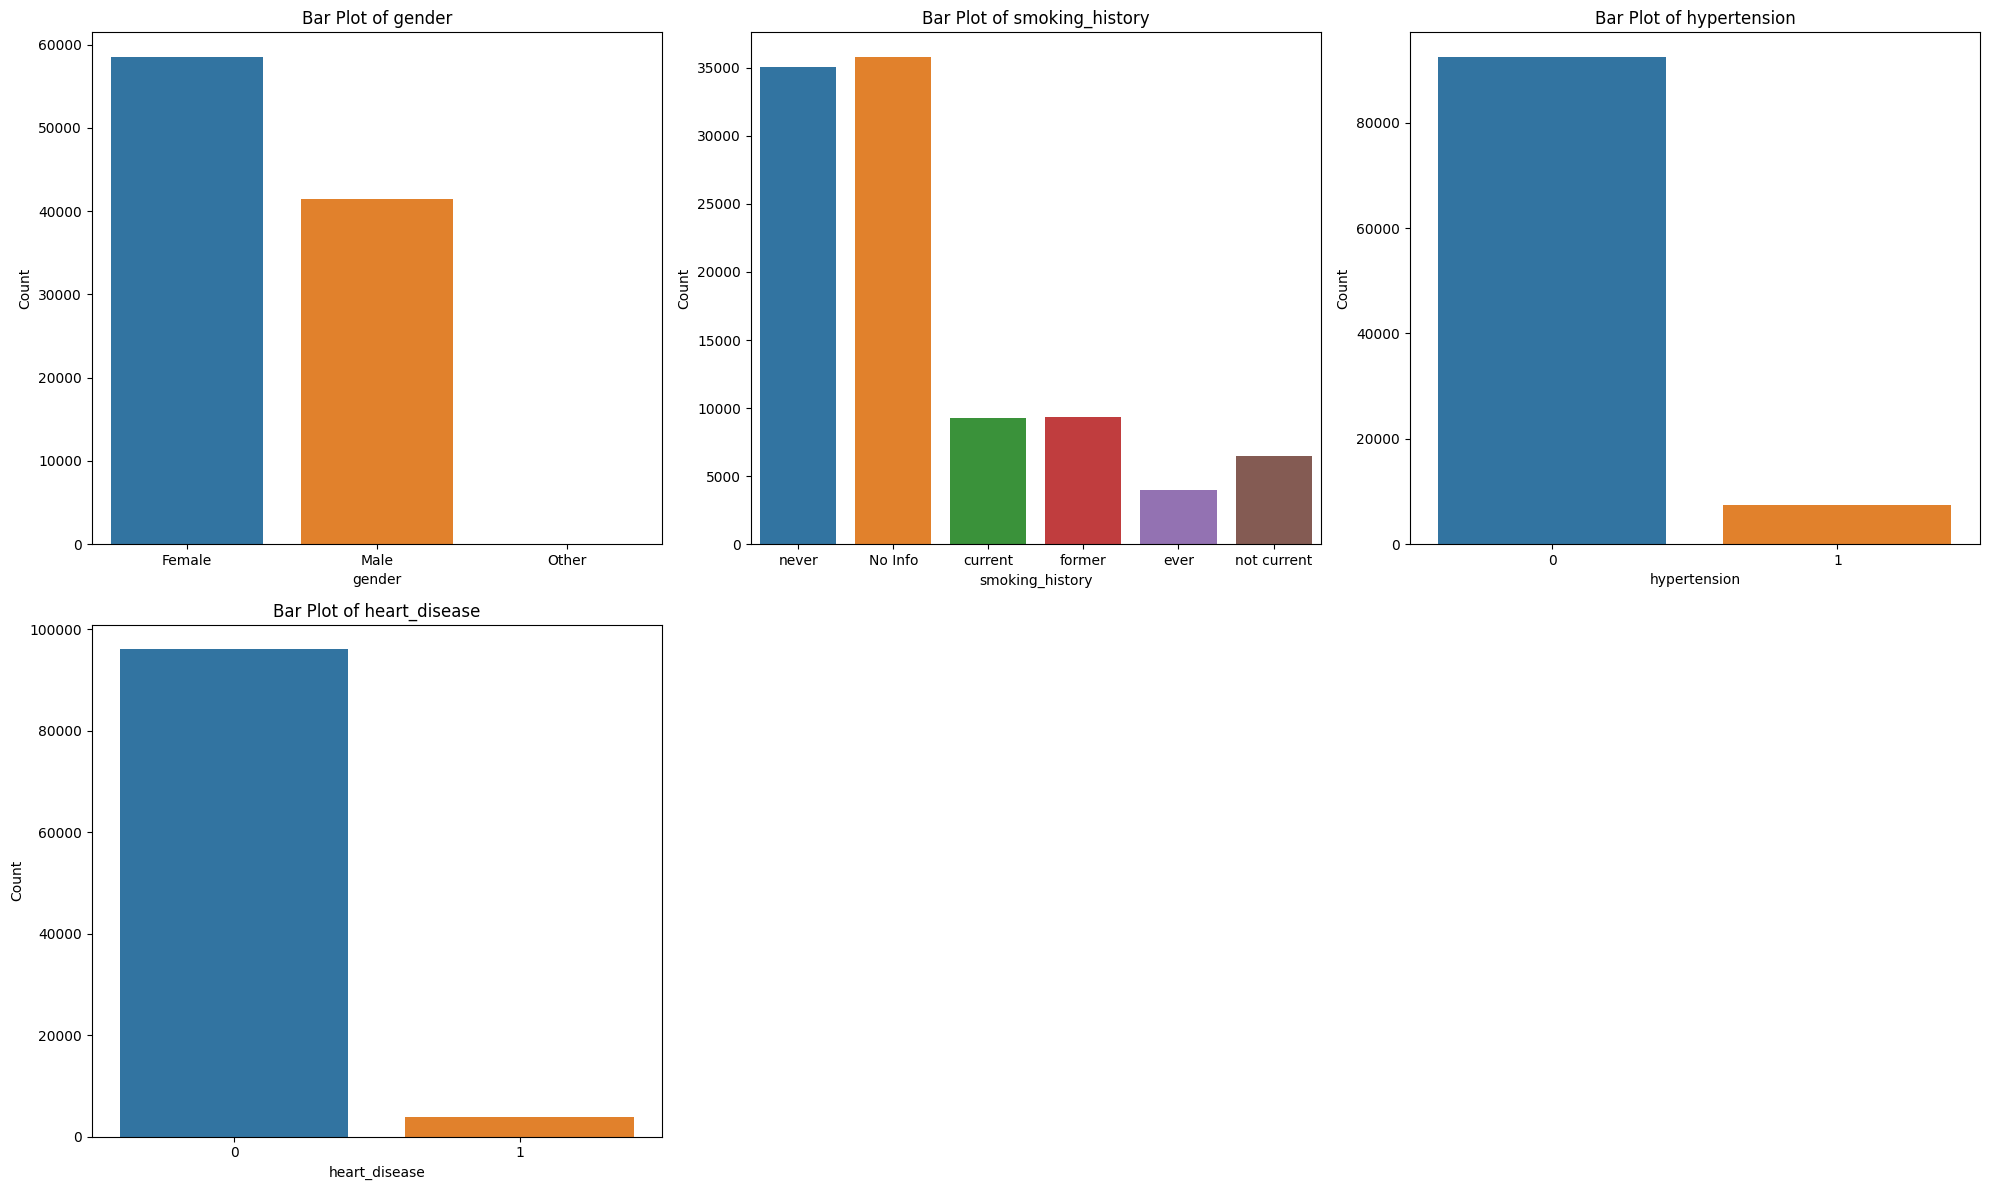

In [12]:
categorical_vars = ["gender", "smoking_history", "hypertension", "heart_disease"]

plt.figure(figsize=(20, 12))

for i in range(len(categorical_vars)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=categorical_vars[i], data=df)
    plt.title(f"Bar Plot of {categorical_vars[i]}")
    plt.xlabel(categorical_vars[i])
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

* According to the bar chart of **gender**, we notice that the dataset is concentrated in more females than males.
* For **smoking history**, a significant number of individuals have not provide information about their smoking history (“No Info”). The remaining distribution shows that the majority have never smoked, followed by former smokers and current smokers.
* For the bar chart of **hypertension**, we can see that most people do not have hypertension.
* The **heart disease** bar chart indicates that the vast majority of people do not have heart disease.
* The dataset for **diabetes** (target variable) is unbalanced, with most people not having diabetes.

### Find correlation between the various variables and diabetes

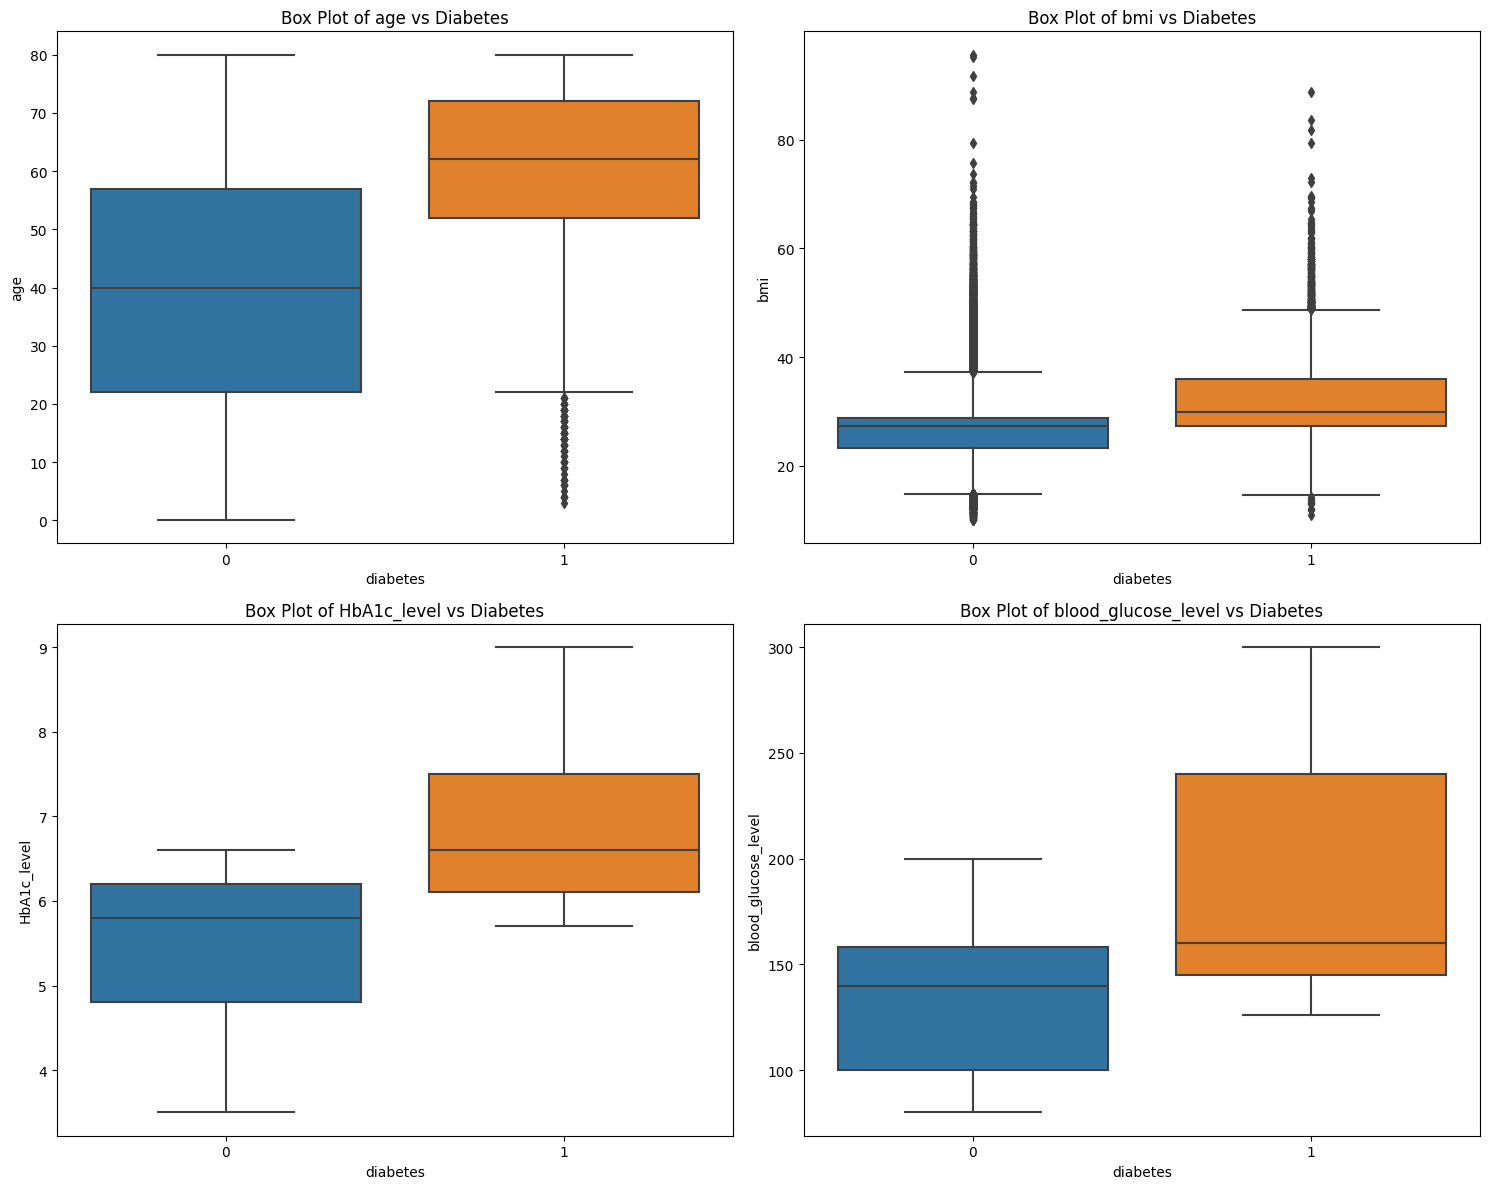

In [13]:
plt.figure(figsize=(15, 12))

index = 1

for var in continuous_vars:
    plt.subplot(2, 2, index)
    sns.boxplot(x='diabetes', y=var, data=df)
    plt.title(f'Box Plot of {var} vs Diabetes')
    
    index += 1

plt.tight_layout()
plt.show()

* People with diabetes tend to be older than people without diabetes. The median age of patients with diabetes was higher.
* The distribution of body mass index is very similar in people with and without diabetes. However, the upper quartile range was slightly higher in patients with diabetes, indicating a higher BMI in this group.
* People with diabetes tend to have higher HbA1c levels compared to people without diabetes. Median HbA1c levels were significantly higher in patients with diabetes.
* People with diabetes have higher blood glucose levels than people without diabetes. There was a clear separation in the distribution of blood glucose levels between the two groups, which indicates that this variable may be a strong predictor of diabetes.

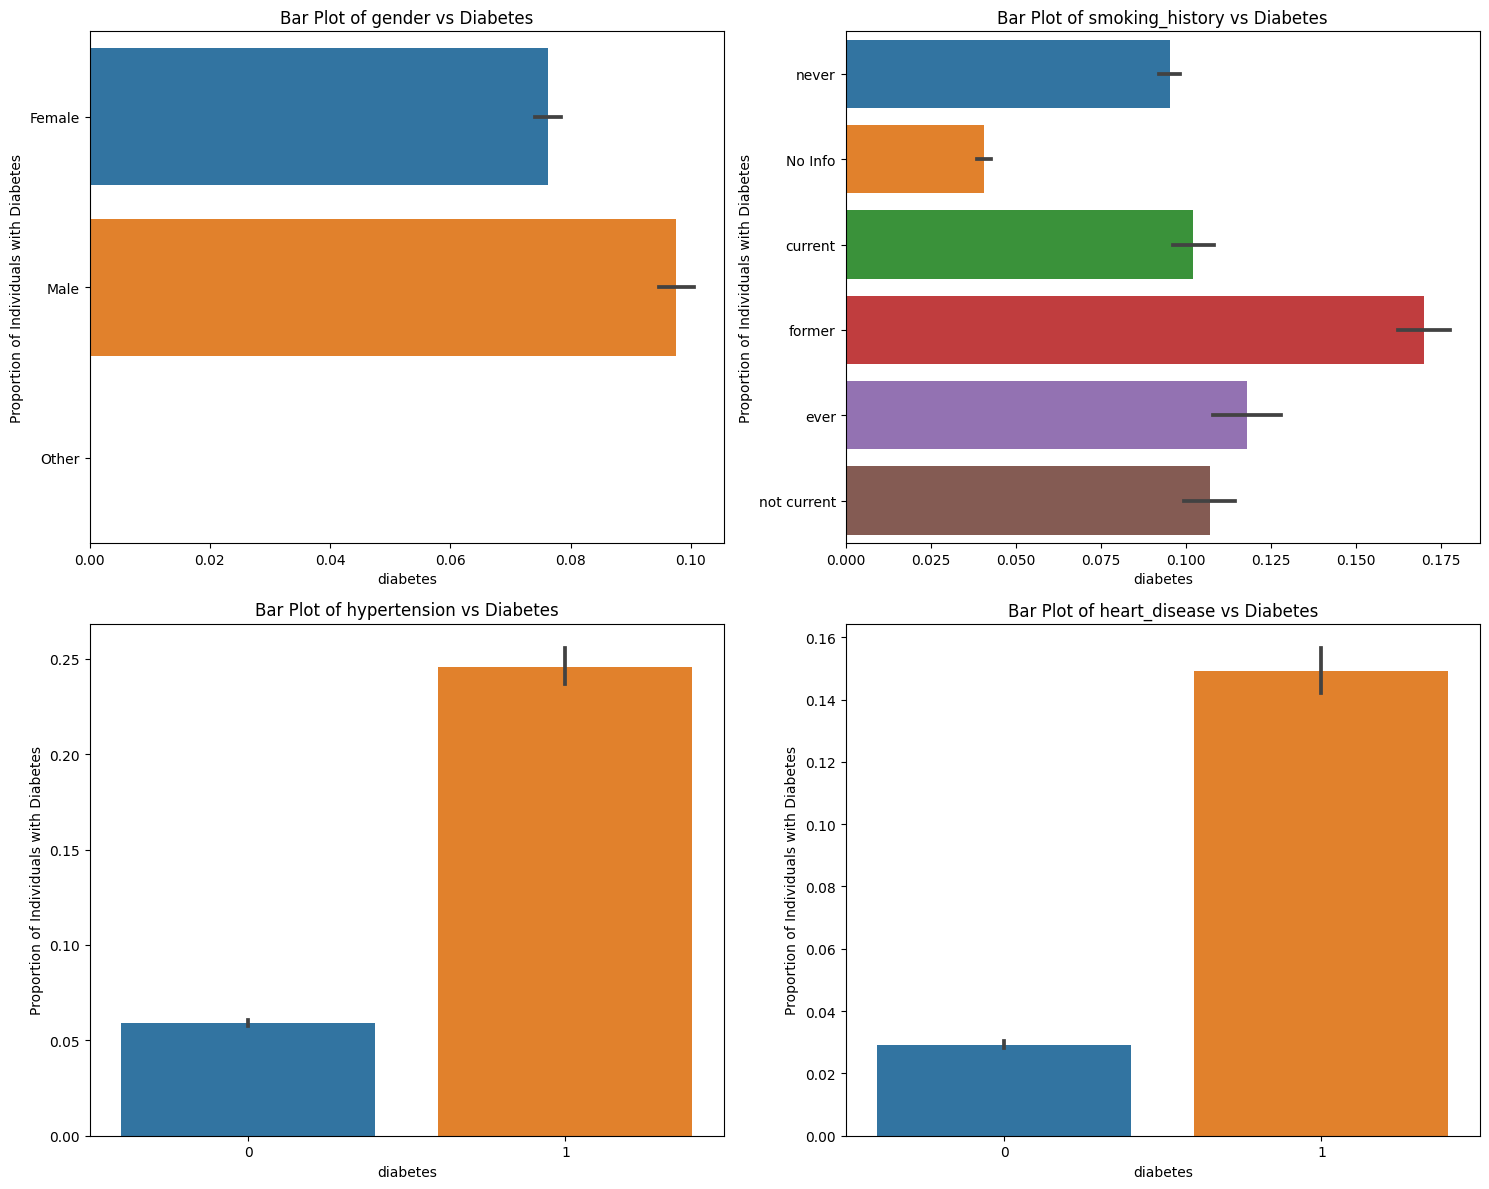

In [14]:
plt.figure(figsize=(15, 12))

count = 1

for col in categorical_vars:
    plt.subplot(2, 2, count)
    sns.barplot(x="diabetes", y=col, data=df)
    plt.ylabel("Proportion of Individuals with Diabetes")
    plt.title(f"Bar Plot of {col} vs Diabetes")
    
    count += 1

plt.tight_layout()
plt.show()

* The proportion of males with diabetes appears to be slightly higher compared to females.
* People with hypertension have significantly higher rates of diabetes than people without hypertensione.
* Similar to hypertension, people with heart disease have higher rates of diabetes than people without heart disease.
* The proportion of people with diabetes varies with smoking history. Those with a history of smoking who were labeled "No Info" appeared to have higher rates of diabetes, followed by those who had quit smoking.

## Machine Learning Models

### Data Processing

In [15]:
# Remove the "Other" from the gender
df = df[df["gender"]!="Other"]
df.gender.value_counts()

Female    58552
Male      41430
Name: gender, dtype: int64

In [16]:
# Check for duplicate
df.duplicated().sum()

3854

In [17]:
# Remove the duplicates since there are 3854 duplicated entries
df = df.drop_duplicates()
df.duplicated().sum()

0

Let's use the get_dummies function to create a new DataFrame where the `"gender"` and `"smoking_history"` columns are one-hot encoded.
For example, `"gender"`: "Male" will be 1 and "Female" will be 0. 

In [18]:
df_encoded = pd.get_dummies(df, columns=["gender", "smoking_history"])
df_encoded.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,1,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,1,0,1,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,0,0,1,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,1,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,0,1,0,1,0,0,0,0


### Logistic Regression Model

In [19]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96128 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          96128 non-null  float64
 1   hypertension                 96128 non-null  int64  
 2   heart_disease                96128 non-null  int64  
 3   bmi                          96128 non-null  float64
 4   HbA1c_level                  96128 non-null  float64
 5   blood_glucose_level          96128 non-null  int64  
 6   diabetes                     96128 non-null  int64  
 7   gender_Female                96128 non-null  uint8  
 8   gender_Male                  96128 non-null  uint8  
 9   smoking_history_No Info      96128 non-null  uint8  
 10  smoking_history_current      96128 non-null  uint8  
 11  smoking_history_ever         96128 non-null  uint8  
 12  smoking_history_former       96128 non-null  uint8  
 13  smoking_history_

* We will select the features `X` and the target `y` variable for our machine learning model.
* Splitting the data into training and testing sets. Divide `X` into `X_train` and `X_test` and `y` into `y_train` and `y_test` using `train_test_split`.  

In [20]:
X = df_encoded.drop("diabetes", axis=1)
y = df_encoded["diabetes"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((76902, 14), (76902,), (19226, 14), (19226,))

In [21]:
clf = LogisticRegression(max_iter=10000, random_state=12)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=12)

* Evaluate the prediction accuracy on the `training` set.

In [22]:
clf.score(X_train,y_train)

0.9588827338690801

In [23]:
(clf.predict(X_train) == y_train).mean()

0.9588827338690801

* Evaluate the prediction accuracy on the `test` set.

In [24]:
clf.score(X_test,y_test)

0.9593779257255799

In [25]:
(clf.predict(X_test) == y_test).mean()

0.9593779257255799

In [26]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


print(accuracy)
print(report)

0.9593779257255799
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     17568
           1       0.86      0.63      0.73      1658

    accuracy                           0.96     19226
   macro avg       0.92      0.81      0.85     19226
weighted avg       0.96      0.96      0.96     19226



* The logistic regression model performed an accuracy of approximately 95.9% on the test data, which is quite good accuracy.
* We don't have to worry overfitting, because the training score is lower than test score.
* Classification report (class 0 (No Diabetes), class 1 (Diabetes)):
  * precision: When the model predicts class 0, it is correct 97% of the time, and when it predicts class 1, it's correct 87% of the time.
  * recall: The model correctly identified 99% of class 0 and 63% of class 1.
  * f1-score: The model is correct 98% of class 0 and 73% of class 1.

Let's generate the confusion matrix to see the true positive/negative and false positive/negative values.

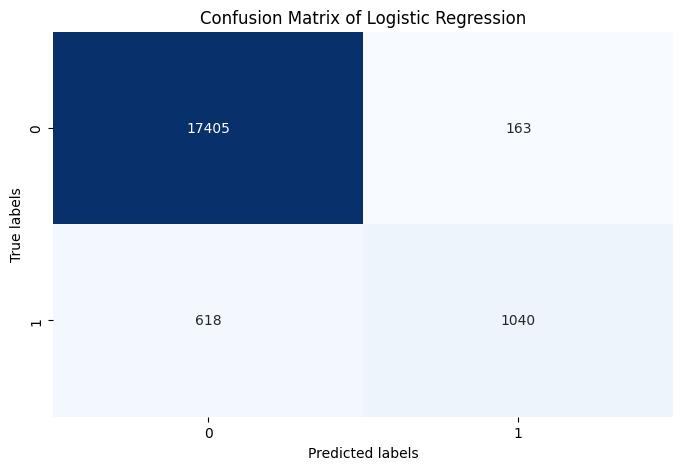

In [27]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 5))
sns.set_style("darkgrid")
sns.heatmap(conf_mat, annot=True, fmt="d", ax=ax, cbar=False, cmap="Blues")
plt.title("Confusion Matrix of Logistic Regression")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

Based on graph above, we predicted 0 and actual is also 0, which is **true negative**. There are 17406 cases were correctly predicted as class 0.

## Extra Topics

### Decision Tree

Let's use Decision Tree to predict the dataset.

In [28]:
X = df_encoded.drop("diabetes", axis=1)
y = df_encoded["diabetes"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=20)

<AxesSubplot:xlabel='max_leaf_nodes', ylabel='loss'>

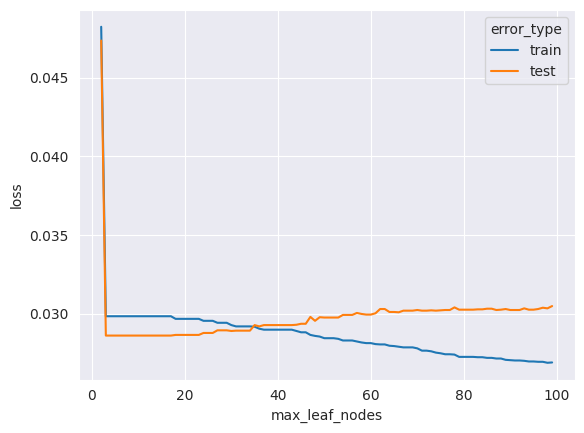

In [29]:
train_1 = {}
test_1 = {}

for n in range(2,100):
    dt = DecisionTreeClassifier(max_leaf_nodes=n) 
    dt.fit(X_train, y_train)
    train_1[n] = mean_absolute_error(y_train, dt.predict(X_train))
    test_1[n] = mean_absolute_error(y_test, dt.predict(X_test))

train_loss = pd.Series(train_1)
test_loss = pd.Series(test_1)
train_loss.name = "train"
test_loss.name = "test"
df_loss = pd.concat((train_loss, test_loss), axis=1)
df_loss.reset_index(inplace=True)
df_loss.rename({"index": "max_leaf_nodes"}, axis=1, inplace=True)
df_melted = df_loss.melt(id_vars="max_leaf_nodes", var_name="error_type", value_name="loss")

sns.lineplot(x="max_leaf_nodes", y="loss", hue="error_type", data=df_melted)

This is training and test loss for Decision Tree. We can see the training and test loss are very close to each other, which is a good sign. This graph shows how to prevent models from overfitting.

In [30]:
dt = DecisionTreeClassifier(max_leaf_nodes=38, random_state=12)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=38, random_state=12)

In [31]:
y_pred_dt = dt.predict(X_test)

In [32]:
print("Training Score: ", dt.score(X_train, y_train))
print("Test Score: ", dt.score(X_test, y_test))

Training Score:  0.9709970039946738
Test Score:  0.9707057256990679


* Based on the Decision Tree Classification, the training and test score are quite close to each other, and both scores are relatively high, indicating good performance.
* The Decision Tree model provides a good accuracy (about 97.07%) for test score.
* We don't have to worry about overfitting, because the small difference between the training and test score indicates that there is no overfitting.


In [33]:
dt.feature_names_in_

array(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'gender_Female', 'gender_Male',
       'smoking_history_No Info', 'smoking_history_current',
       'smoking_history_ever', 'smoking_history_former',
       'smoking_history_never', 'smoking_history_not current'],
      dtype=object)

Let's see the Decision Tree by plot_tree.

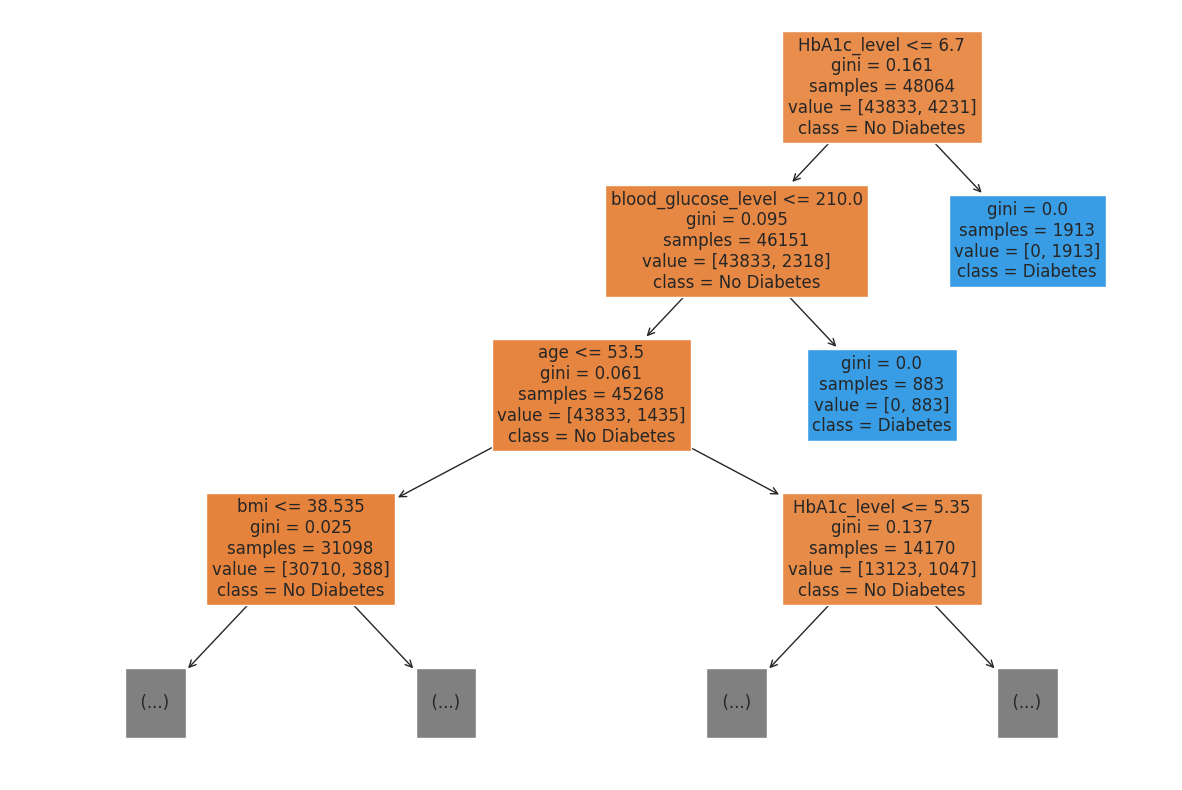

In [34]:
plt.figure(figsize=(15, 10))
plot_tree(
    dt, 
    feature_names=dt.feature_names_in_, 
    class_names=["No Diabetes", "Diabetes"], 
    filled=True, 
    max_depth=3, 
    fontsize=12)
plt.show()

According to the graph, HbA1c level, blood glucose level, bmi and age are the main features in the Decision Tree that seems these features are the most important in the dataset. Let's calculate them to find the most important features.

In [35]:
pd.Series(dt.feature_importances_, index=dt.feature_names_in_)

age                            0.020694
hypertension                   0.002860
heart_disease                  0.006531
bmi                            0.018486
HbA1c_level                    0.629925
blood_glucose_level            0.320787
gender_Female                  0.000000
gender_Male                    0.000000
smoking_history_No Info        0.000717
smoking_history_current        0.000000
smoking_history_ever           0.000000
smoking_history_former         0.000000
smoking_history_never          0.000000
smoking_history_not current    0.000000
dtype: float64

* We can see the most important features are: HbA1c_level > blood glucose level > age > bmi
* The factor that has the most impact on decision tree is higher values in the features importance. For instance, the most relevant factors for predicting whether a person has diabetes are HbA1c and blood glucose.

### Random Forest

We will use Random Forest to predict. Decision Tree provides a good accuracy, and I expect Random Forest will have similar result.

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.3, random_state = 18)

In [37]:
rf = RandomForestClassifier(n_estimators = 200, max_leaf_nodes = 38, random_state = 18)
rf.fit(X_train, y_train)
RandomForestClassifier(max_leaf_nodes = 38)

RandomForestClassifier(max_leaf_nodes=38)

In [38]:
y_pred_rf = rf.predict(X_test)

In [39]:
print("Training Score: ", rf.score(X_train, y_train))
print("Test Score: ", rf.score(X_test, y_test))

Training Score:  0.9703516193910812
Test Score:  0.9709317877842175


* Random Forest Classification is roughly same as Decision Tree Classification, their's training and test score are realetively close to each other, and there is no overfitting and underfitting. 
* We can see the accuracy for Random Forest on the test data set is about 97.09%, which is really high that could predict diabetes accurately.

## Summary

In this project, we focus on whether and how various variables are related to diabetes prevalence and to identifying risk factors. We use two different machine learning models to predict. We found that both the Decision Tree Model and the Random Forest Model achieved a high accuracy (97%), and the difference between them was really small, with the Random Forest producing slightly more accurate predictions. In addition, the highest correlation between diabetes and important features is the HbA1c level, which is approximately 62.9%. Although the accuracy is relatively high, we are still unable to determine whether the medical history is related to people having diabetes, because through the confusion matrix, we know that sometimes there are some false negatives, resulting in people thinking they do not have diabetes.

## References

Your code above should include references.  Here is some additional space for references.

* What is the source of your dataset(s)?
https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

* List any other references that you found helpful.
    * Seaborn Visualization (histograms, boxplot, barplot, and etc.): Seaborn.pydata https://seaborn.pydata.org/generated/seaborn.objects.Plot.html
    * Matplotlib Visualization: https://matplotlib.org/stable/tutorials/index
    * Confusion Matrix: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
    * Decision Trees: https://scikit-learn.org/stable/modules/tree.html
    * Random Forests: https://scikit-learn.org/stable/modules/ensemble.html#random-forests


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6f1e7d2a-95d5-4ab1-bfcf-b9b6ac2a43b6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>